# K Nearest Neighbors Project 

This is a simple project that uses dummie data to practice and demonstrate my knowledge of the KNN algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Importing the data**

In [2]:
df = pd.read_csv('KNN_Project_Data')

**Checking the dataframe.**

In [3]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


**Since this data is artificial, I just created a large pairplot with seaborn. to observe the classification of all the variables according to the '<u>_Target Class_</u>' column.**

In [5]:
sns.set_style(style='whitegrid')

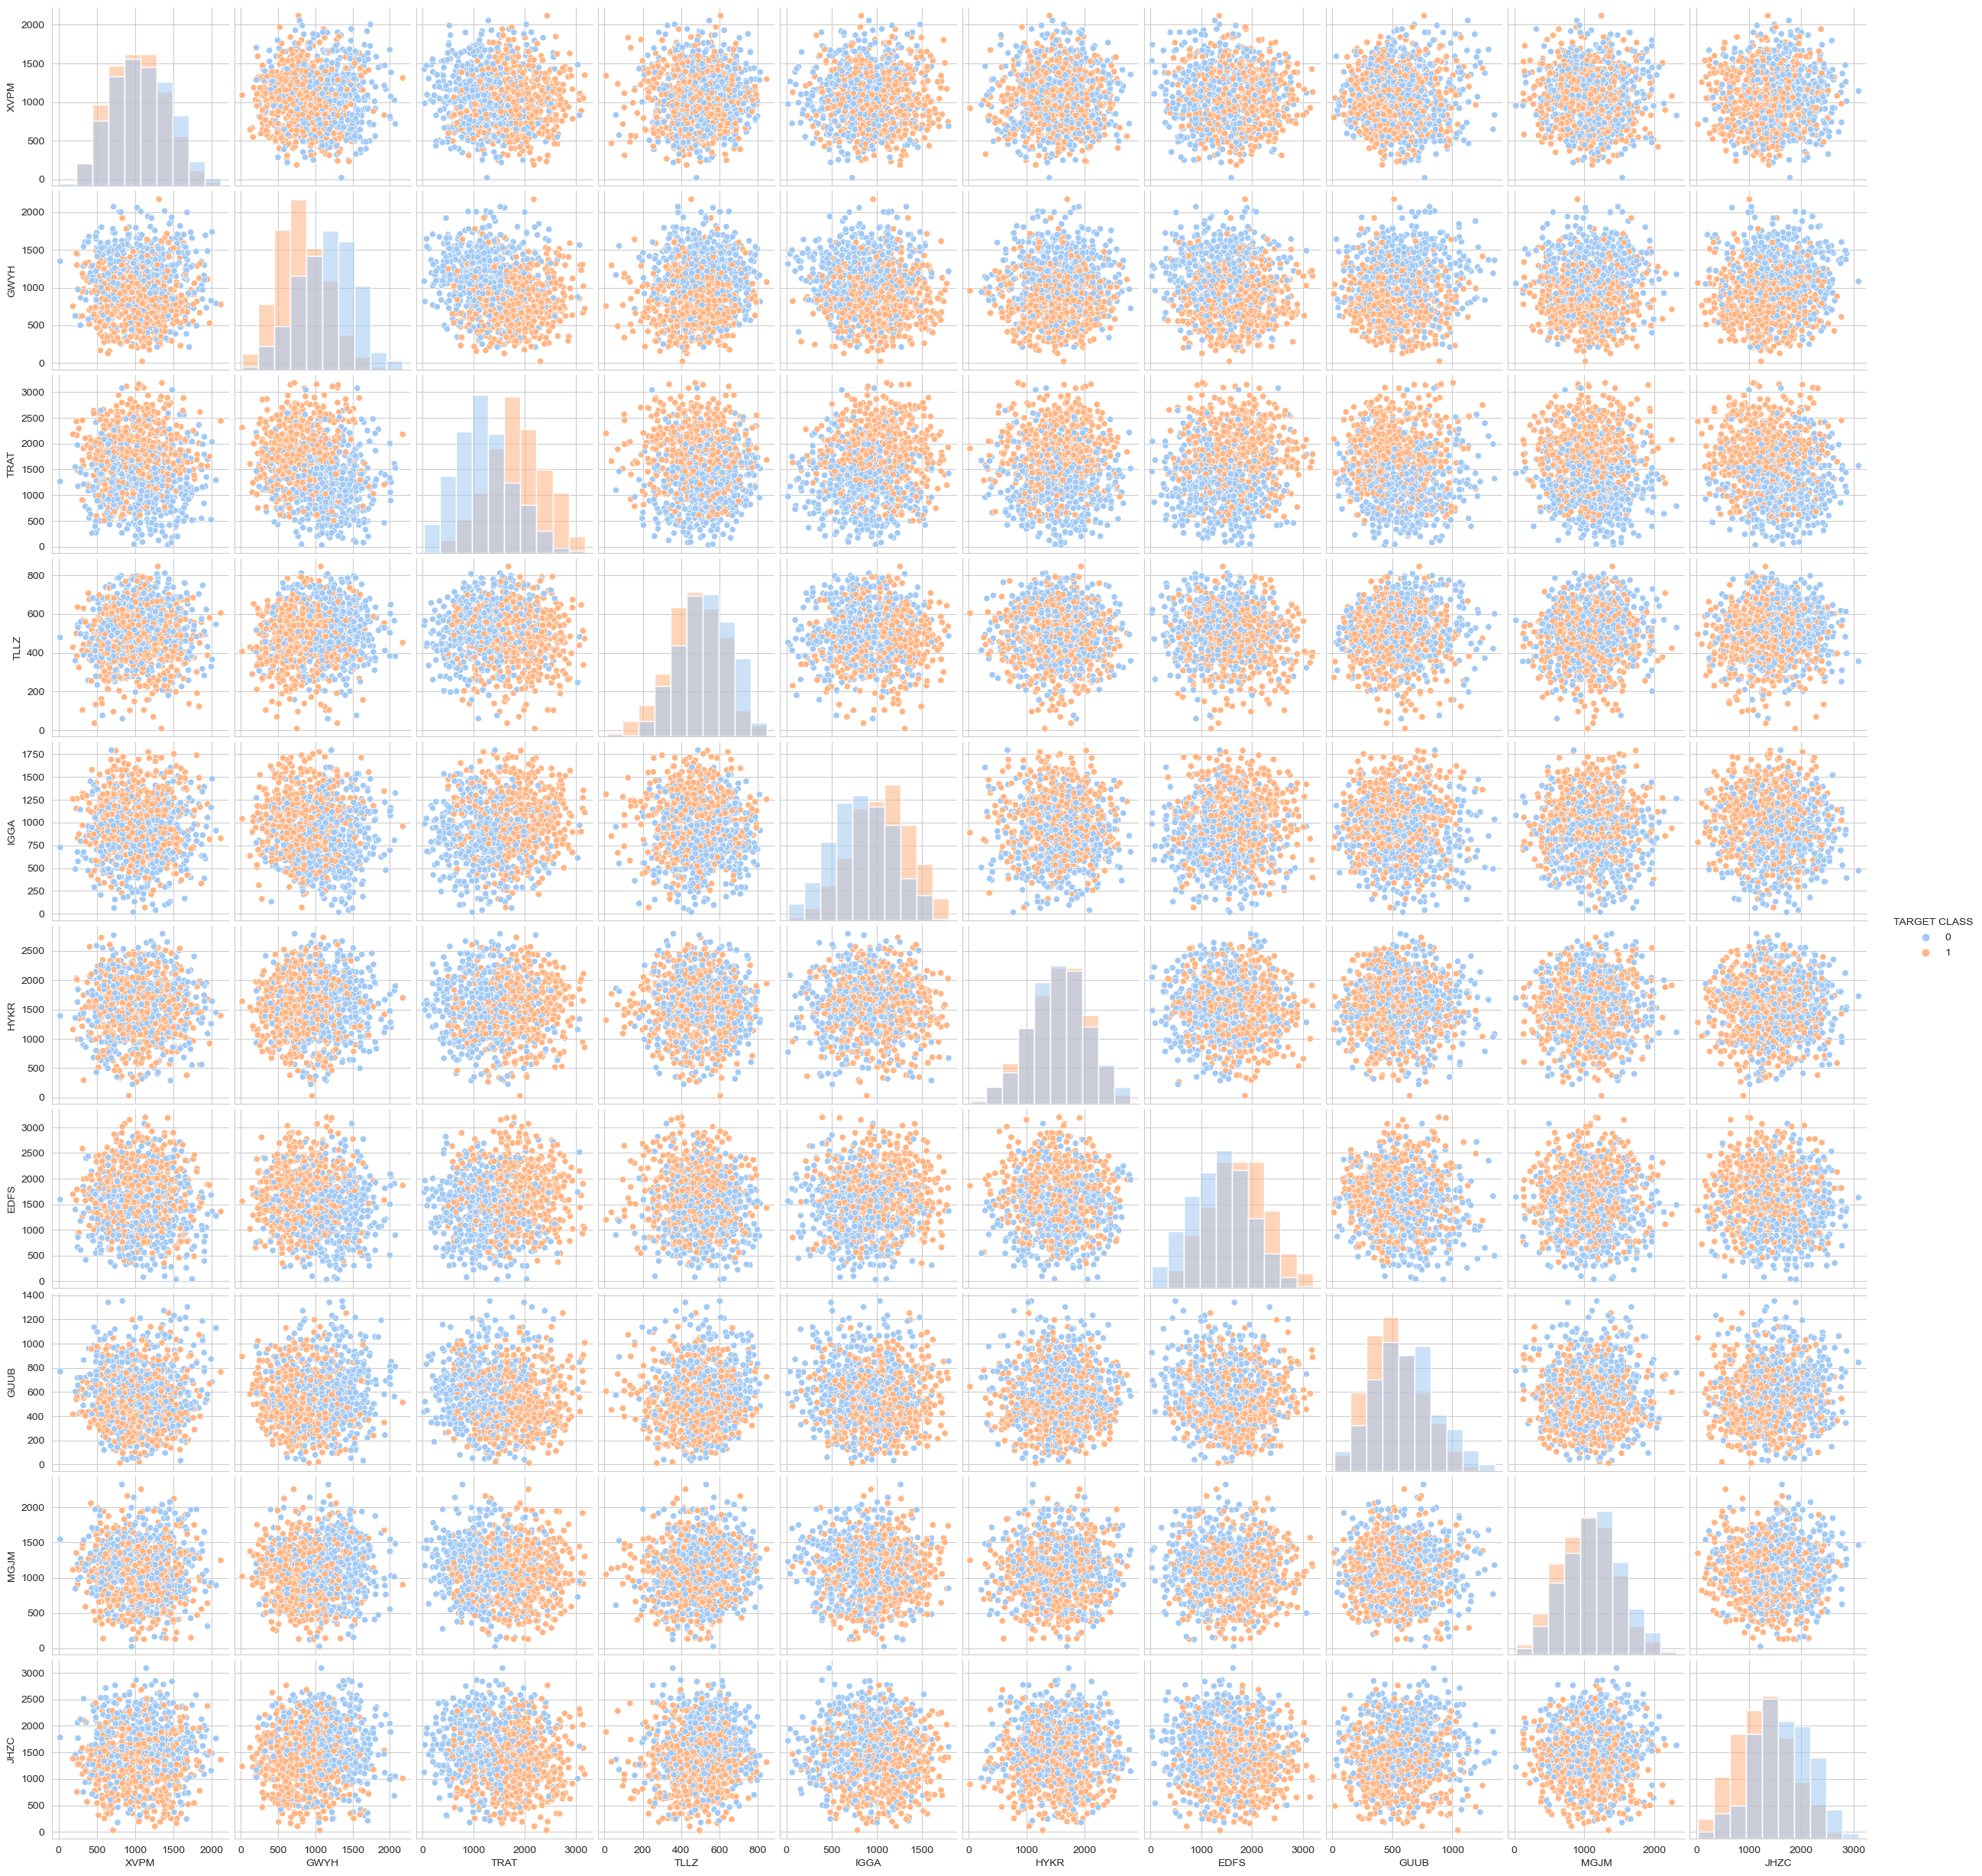

In [6]:
sns.pairplot(data=df,hue='TARGET CLASS',palette='pastel',diag_kind='hist',diag_kws = {'alpha':0.55, 'bins':10})

It is evident that the data is pretty noisy and that finding a K value with a relevant accuracy score will be heavily dependant of the elbow method.

# Standardize the Variables

In this section I use the _StandardScaler( )_ function from Scikit to standardize the distance between the data points to prepare the data to execute the algorithm.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

**<p>Here is fit the standardized object I named '_scaler_' to the features of the dataframe.</p>**
**<p>I'm ensuring that the '_TARGET CLASS_' column is not in the set of data that is veing fit.</p>**

In [9]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

**Then I sse the '_.transform( )_' method to transform the features to a scaled version.**

In [10]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**<p>Then I convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.</p>**
**<p>Important to notice that this data does not include the classification column.</p>**

In [11]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split


I this section I use train_test_split to split the data into a training set and a testing set.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df_feat
y = df['TARGET CLASS']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Using KNN

In this section I use the KNN algorithm with the trained data.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

**Here I create a KNN model instance with n_neighbors=1**

In [30]:
knn = KNeighborsClassifier(n_neighbors=1)

**Then I fit this KNN model to the training data.**

In [31]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
In this section I create the predictions and the confusion matrix to evaluate the model

**Here I use the predict method to predict values using the KNN model and X_test.**

In [32]:
pred = knn.predict(X_test)

**Here I create a confusion matrix and classification report.**

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300




# Choosing a K Value
Since the classification report had low values with the K value _(I used n_neighbors = 1 before)_ using the elbow method.

**<p>In order to do so I created a '_for_' loop that trains various KNN models with different k values, then I kept track of the '_error_rate_' for each of these models with a list.</p>**

**<p>I set the ecaluation range as (1,60) to get a wide reference of the possible K values</p>**

In [37]:
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Then I plotted the data resulting from the '_for_' loop.**

Text(0, 0.5, 'Error Rate')

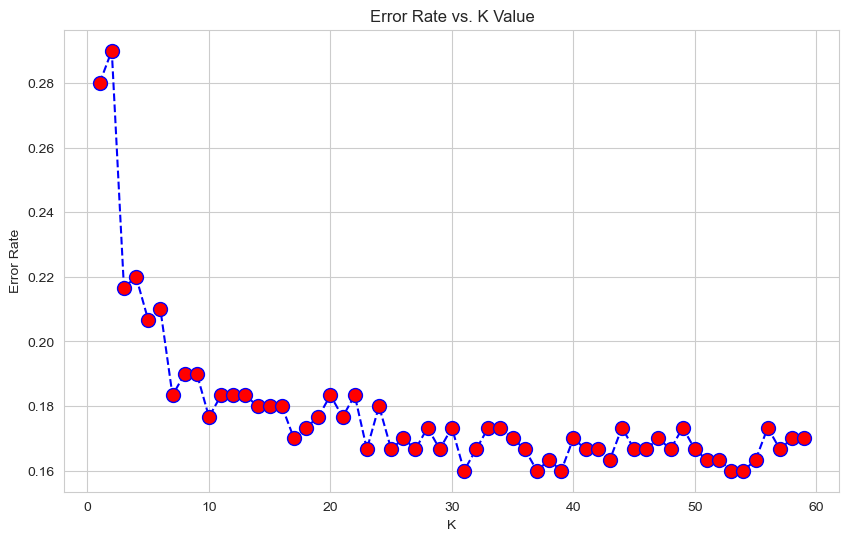

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In this chart it's evident that _n_neighbors = 1_ has such a lowe precision score.
<p>According to this though I can also determine that the lowest _error rate_ i within 31, 36, 39, 53 and 54. In order to keep the ranges as low as possible I will use 31 as the K value.</p>

## Retraining with new K Value

**Here I retrain the model with the best K value (_n_neighbors = 31_) and re-do the classification report and the confusion matrix.**

In [38]:
knn = KNeighborsClassifier(n_neighbors=31)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [39]:
print('WITH K=31')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=31


[[123  29]
 [ 19 129]]


              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



The results from the chart are evident in the classification report since we get a more satisfying result than what we got at first.

An accuracy value of 0.81 for the f1-score is enough, but I would recommend to use a different classification algorithm or work with the data to clean it better.